# Support Vector Regression (SVR)

## Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [17]:
data = pd.read_csv(r'Position_Salaries.csv')
X = data.iloc[:,1:-1].values; print(X)
y = data.iloc[:,-1].values; print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [18]:
y = y.reshape(len(y),1)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [20]:
print(X,'\n')
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [21]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

C:\Users\ANP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting a new result

In [22]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

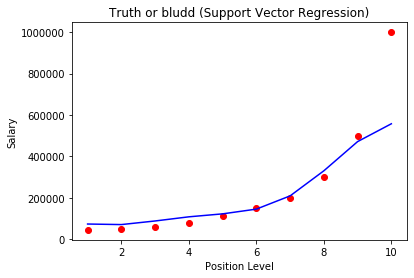

In [30]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or bludd (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

Text(0, 0.5, 'Salary')

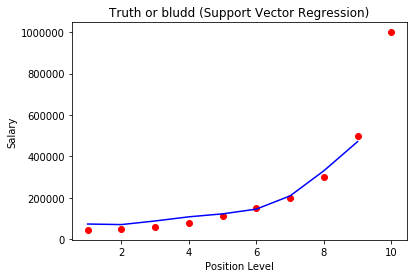

In [44]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)))
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or bludd (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')